# **Importing Necessary Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.compat import lzip
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import kstest
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Problem Statement**

* Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [2]:
df = pd.read_csv("/content/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# **Dataset Description :**

* **Attribute Information**

1. R&D Spend -- Research and devolop spend in the past few years
2. Administration -- spend on administration in the past few years
3. Marketing Spend -- spend on Marketing in the past few years
4. State -- states from which data is collected
5. Profit  -- profit of each state in the past few years

# **Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.agg(["skew","kurt"])

,R&D Spend,Administration,Marketing Spend,Profit
skew,0.164002,-0.489025,-0.046472,0.023291
kurt,-0.761465,0.225071,-0.671701,-0.063859


In [7]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

R&D Spend 
 0.00         2
165349.20    1
28663.76     1
72107.60     1
66051.52     1
65605.48     1
61994.48     1
61136.38     1
63408.86     1
55493.95     1
46426.07     1
46014.02     1
44069.95     1
64664.71     1
20229.59     1
38558.51     1
28754.33     1
27892.92     1
23640.93     1
15505.73     1
22177.74     1
1000.23      1
1315.46      1
75328.87     1
77044.01     1
162597.70    1
67532.53     1
153441.51    1
144372.41    1
142107.34    1
131876.90    1
134615.46    1
130298.13    1
120542.52    1
123334.88    1
101913.08    1
100671.96    1
93863.75     1
91992.39     1
119943.24    1
114523.61    1
78013.11     1
94657.16     1
91749.16     1
86419.70     1
76253.86     1
78389.47     1
73994.56     1
542.05       1
Name: R&D Spend, dtype: int64
Administration 
 136897.80    1
51283.14     1
127864.55    1
182645.56    1
153032.06    1
115641.28    1
152701.92    1
129219.61    1
103057.49    1
157693.92    1
85047.44     1
127056.21    1
65947.93     1
151377.59  

In [8]:
for i in df.columns:
    print(i , "\n" , df[i].unique())

R&D Spend 
 [165349.2  162597.7  153441.51 144372.41 142107.34 131876.9  134615.46
 130298.13 120542.52 123334.88 101913.08 100671.96  93863.75  91992.39
 119943.24 114523.61  78013.11  94657.16  91749.16  86419.7   76253.86
  78389.47  73994.56  67532.53  77044.01  64664.71  75328.87  72107.6
  66051.52  65605.48  61994.48  61136.38  63408.86  55493.95  46426.07
  46014.02  28663.76  44069.95  20229.59  38558.51  28754.33  27892.92
  23640.93  15505.73  22177.74   1000.23   1315.46      0.      542.05]
Administration 
 [136897.8  151377.59 101145.55 118671.85  91391.77  99814.71 147198.87
 145530.06 148718.95 108679.17 110594.11  91790.61 127320.38 135495.07
 156547.42 122616.84 121597.55 145077.58 114175.79 153514.11 113867.3
 153773.43 122782.75 105751.03  99281.34 139553.16 144135.98 127864.55
 182645.56 153032.06 115641.28 152701.92 129219.61 103057.49 157693.92
  85047.44 127056.21  51283.14  65947.93  82982.09 118546.05  84710.77
  96189.63 127382.3  154806.14 124153.04 115816.2

In [9]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 1 categorical variables

The categorical variables are :
 ['State']


There are 4 Numeric variables

The Numeric variables are :
 ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']


## **Visualization**

Skew: 0.164002172321177
Kurtosis: -0.7614645568424674


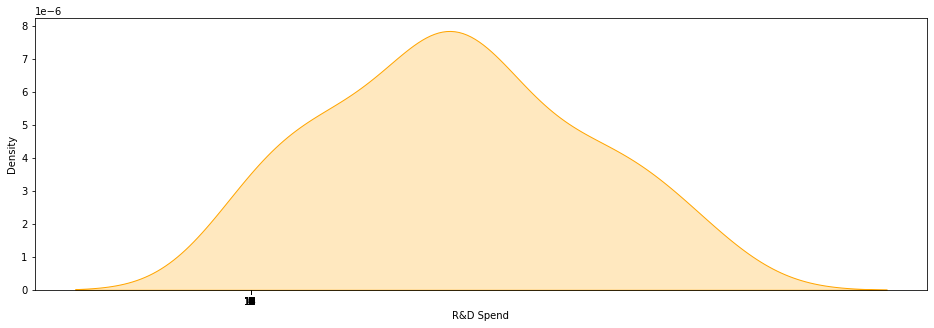

Skew: -0.4890248099671768
Kurtosis: 0.22507113536865386


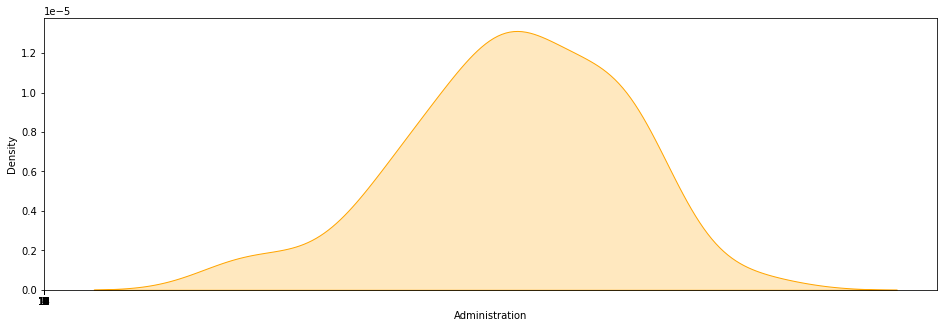

Skew: -0.04647226758360412
Kurtosis: -0.6717011281297514


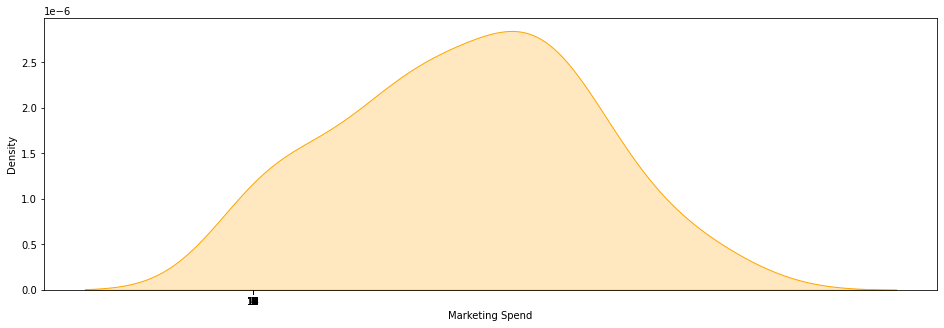

Skew: 0.023291019769116614
Kurtosis: -0.06385888546853113


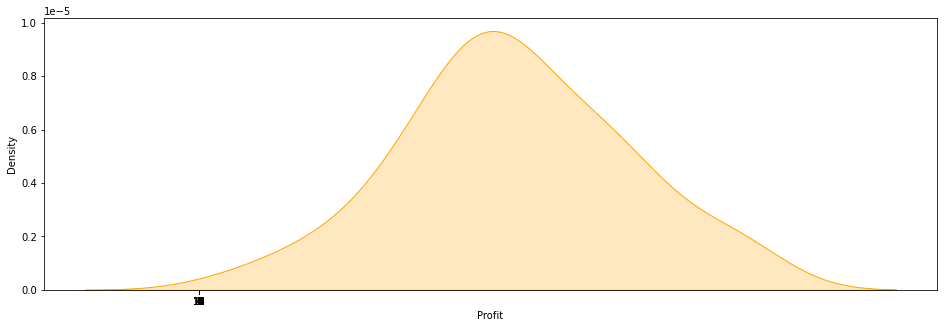

In [10]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(df[i].skew()))
  print("Kurtosis: {}".format(df[i].kurtosis()))
  ax = sns.kdeplot(df[i],shade=True,color='Orange')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()


<Figure size 360x360 with 0 Axes>

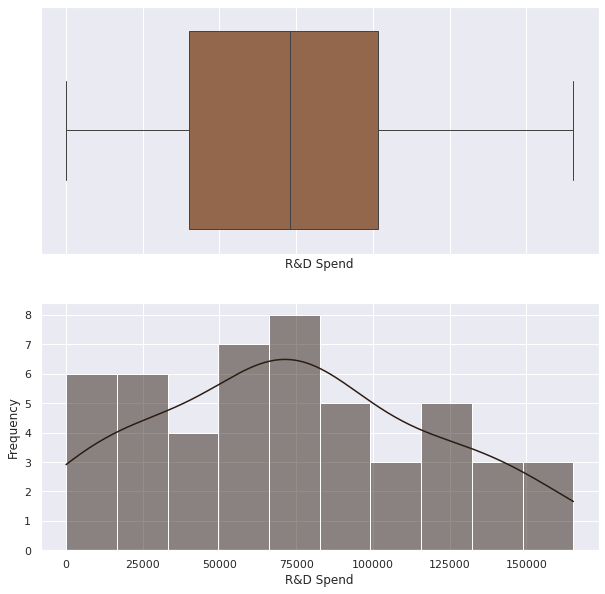

<Figure size 360x360 with 0 Axes>

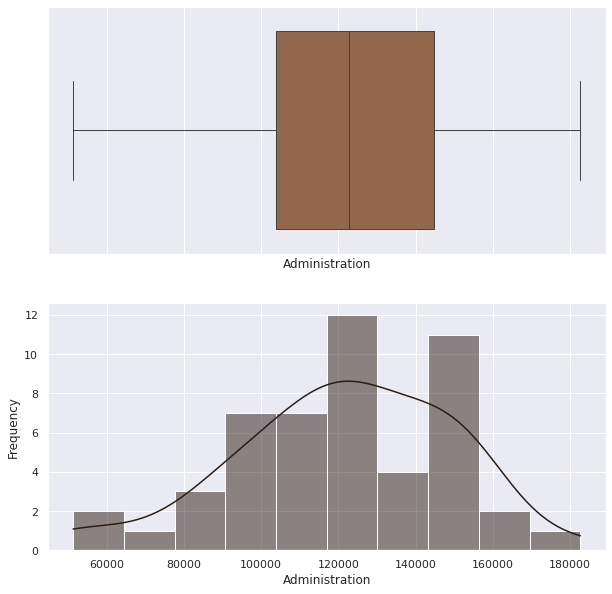

<Figure size 360x360 with 0 Axes>

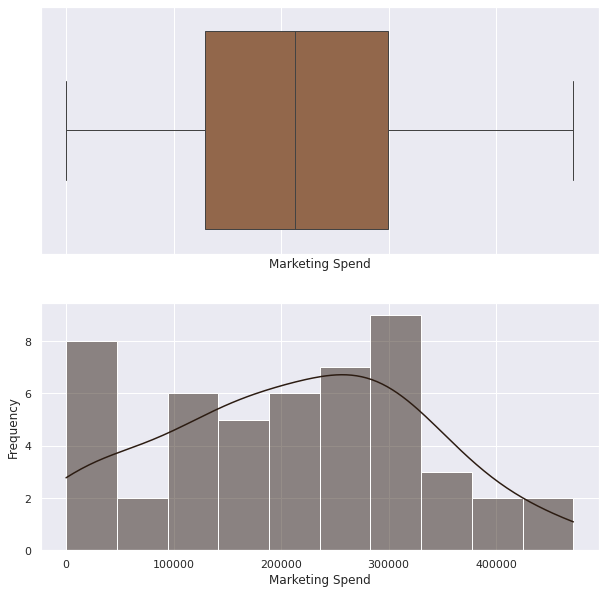

<Figure size 360x360 with 0 Axes>

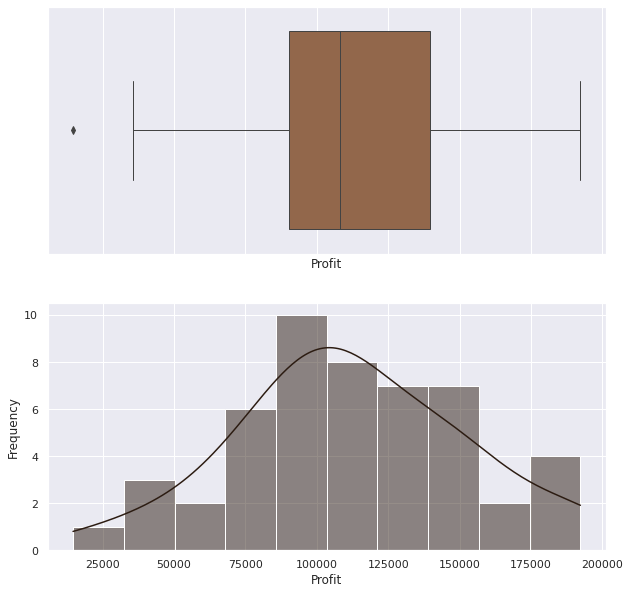

In [11]:
for i in numeric:
    plt.figure(figsize=(5,5))
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="copper")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="copper")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="copper")

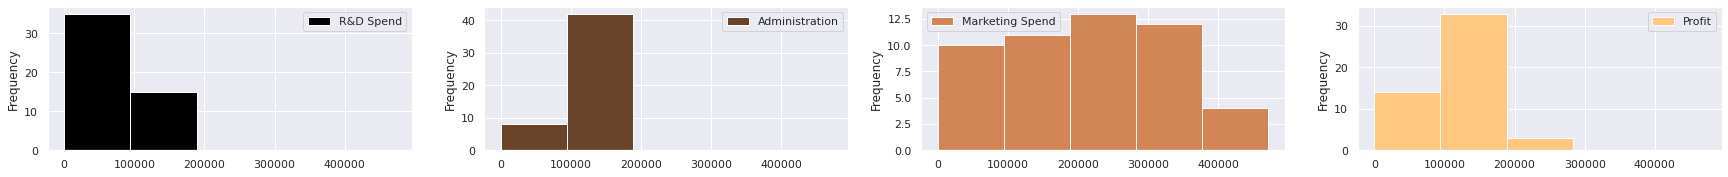

In [12]:
plt.rcParams['figure.figsize']=(30,28)
df.plot(kind='hist', bins=5, subplots=True,  cmap="copper",layout=(9,4), sharex=False, sharey=False)
plt.show()

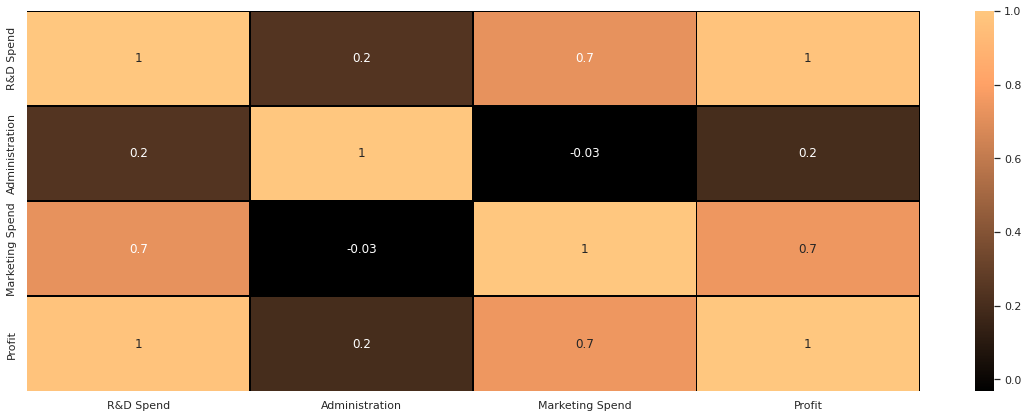

In [13]:
plt.figure(figsize=(20,7))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="copper", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

# **Multiple Linear Regression**

## **Encoding Variables**

In [14]:
df = pd.get_dummies(df , columns = ["State"])
df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [15]:
df1 = df.copy()

In [16]:
x1 = df1["R&D Spend"]
x2 = df1["Administration"] 
x3 = df1["Marketing Spend"]
x4 = df1["State_California"]
x5 = df1["State_Florida"]
x6 = df1["State_New York"]
y1 = df1["Profit"]

In [17]:
# Defining a dictionary specifying various models
params = {"No Transformation" : {"x1" : x1, "x2" : x2, "x3" : x3 , "x4" : x4, "x5" : x5, "x6" : x6 ,"y" : y1},
          "Square-Root-Tran-X-Y" : {"x1" : np.sqrt(x1), "x2" : np.sqrt(x2), "x3" :np.sqrt(x3), "x4" :np.sqrt(x4),"x5" :np.sqrt(x5) , "x6" :np.sqrt(x6) ,"y" : np.sqrt(y1)},
          "SquareRoot-Tran(X)" : {"x1" : np.sqrt(x1), "x2" : np.sqrt(x2), "x3" :np.sqrt(x3), "x4" :np.sqrt(x4),"x5" :np.sqrt(x5) , "x6" :np.sqrt(x6), "y" : y1},
          "SquareRoot-Tran(Y)" : {"x1" : x1, "x2" : x2, "x3" : x3, "x4" : x4, "x5" : x5, "x6" : x6, "y" : np.sqrt(y1)}}

In [18]:
# Creating the models
R_square=[] # Empty list for storing the R Square of all the models
Adj_R_square = [] # Empty list for storing the Adjusted R Square of all the models
MSE1 = [] # Empty list for storing the MSE of all the models

for key, val in params.items():
    print('\033[1m' + '\033[4m' + key,":" + '\033[0m',"\n\n") #model name
    x1 = val['x1']
    x2 = val['x2'] 
    x3 = val['x3']
    x4 = val['x4']
    x5 = val['x5']
    x6 = val['x6']
    y1 = val['y']
    
    model1 = smf.ols('y1~x1+x2+x3+x4+x5+x6', data=df1).fit() #model fitting
    print(model1.summary(),"\n\n")
    

    R_square.append(model1.rsquared)
    Adj_R_square.append(model1.rsquared_adj)
    MSE1.append(model1.mse_model)

No Transformation : 


                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.34e-27
Time:                        10:12:18   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.

In [19]:
# Printing the results from all the models
Models1 = params.keys()
joined1 = list(zip(Models1, R_square, Adj_R_square, MSE1))
Results1 = pd.DataFrame(joined1, columns=['Models', 'R-Square', 'Adjusted R-Square','MSE'])
Results1

,Models,R-Square,Adjusted R-Square,MSE
0,No Transformation,0.950752,0.945156,1.513690e+10
1,Square-Root-Tran-X-Y,0.931286,0.923478,3.841633e+04
2,SquareRoot-Tran(X),0.908514,0.898117,1.446441e+10
3,SquareRoot-Tran(Y),0.896162,0.884362,3.696743e+04


We shall use the model with no transformation as it has high value of R-squared and Adjusted R-squared.

In [20]:
model1 = smf.ols('y1~x1+x2+x3+x4+x5+x6', data=df1).fit() #model fitting
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     75.95
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.65e-20
Time:                        10:12:18   Log-Likelihood:                -222.44
No. Observations:                  50   AIC:                             456.9
Df Residuals:                      44   BIC:                             468.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.8597     11.859     14.408      0.0

## **Hypothesis Testing:**

### **Significancy of the regression coefficients**

>H0 : The regression coefficients are insignificant

>H1 : The regression coefficients are significant

In [21]:
round(model1.pvalues,4)

Intercept    0.0000
x1           0.0000
x2           0.9975
x3           0.3251
x4           0.0000
x5           0.0000
x6           0.0000
dtype: float64

#### Conclusion:
The p-value for x2 and x3 are greater than 0.05, hence, we do not reject H0 for these variables and conclude that the regression coefficients are insignificant.



### **Significancy of the model :**

>H0 : The model is insignificant

>H1 : The model is significant

In [22]:
round(model1.f_pvalue,4)

0.0

#### Conclusion:
The p-value for the F-test to check the significancy of the model is less than 0.05, hence we reject H0 and conclude that the model is significant.

## **Checking the Assumptions of the linear regressioin**

### **1. Linearity**

Indiviadual Comparison 




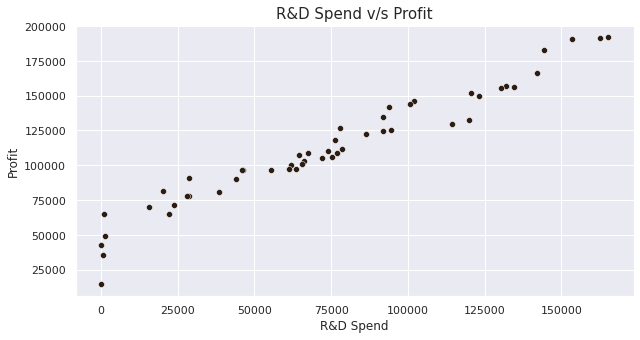

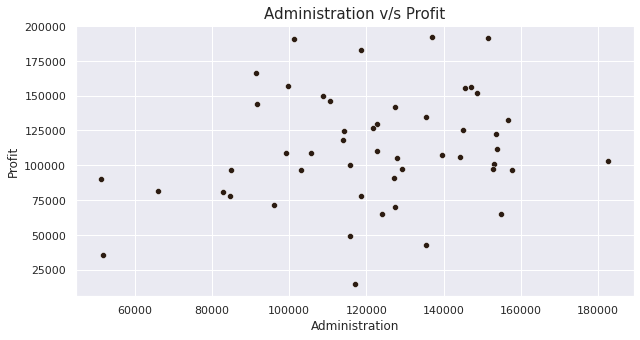

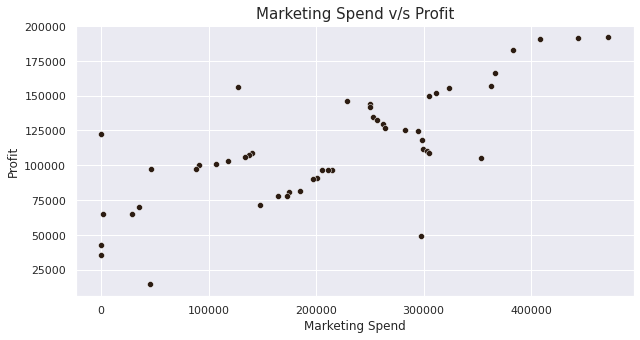

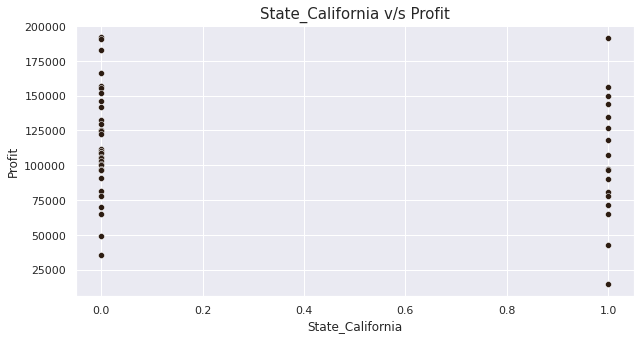

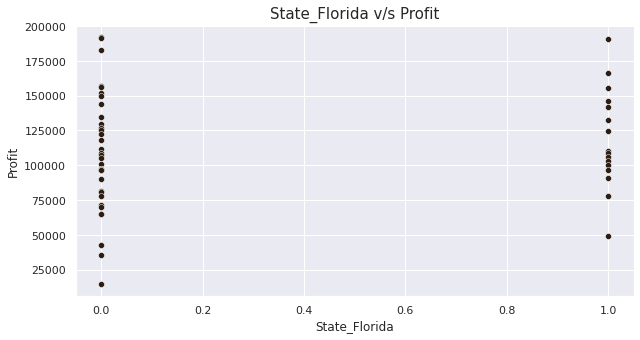

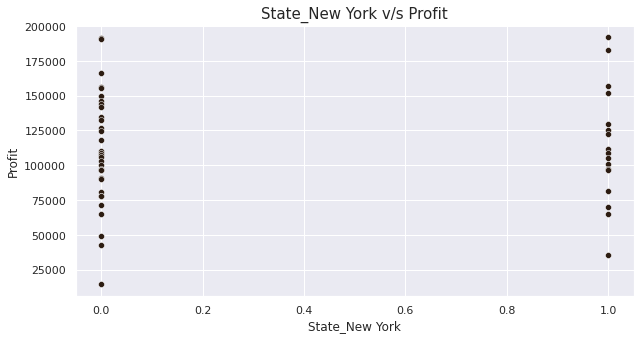

In [23]:
names = df1.drop(['Profit'], axis=1).columns
print("Indiviadual Comparison \n\n")
for i in names:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df1, x=i, y="Profit")
    plt.title(label=f'{i} v/s Profit', size=15)
    plt.show()

#### **Conclusion:**

1. there exists perfect liner relationship between R&D spend and profit.
2. there does not exist any linear relationship between Administration and profit.
3. there exists a-kind of liner relationship between Marketting spend and profit.

### **2. Testing Multicollinearity**

#### **(a)Pair plot**

We shall see if there is correlation between the variables, by using pairplot.

In [24]:
# We shall remove the output variable
data = df1.drop(["Profit"], axis=1)

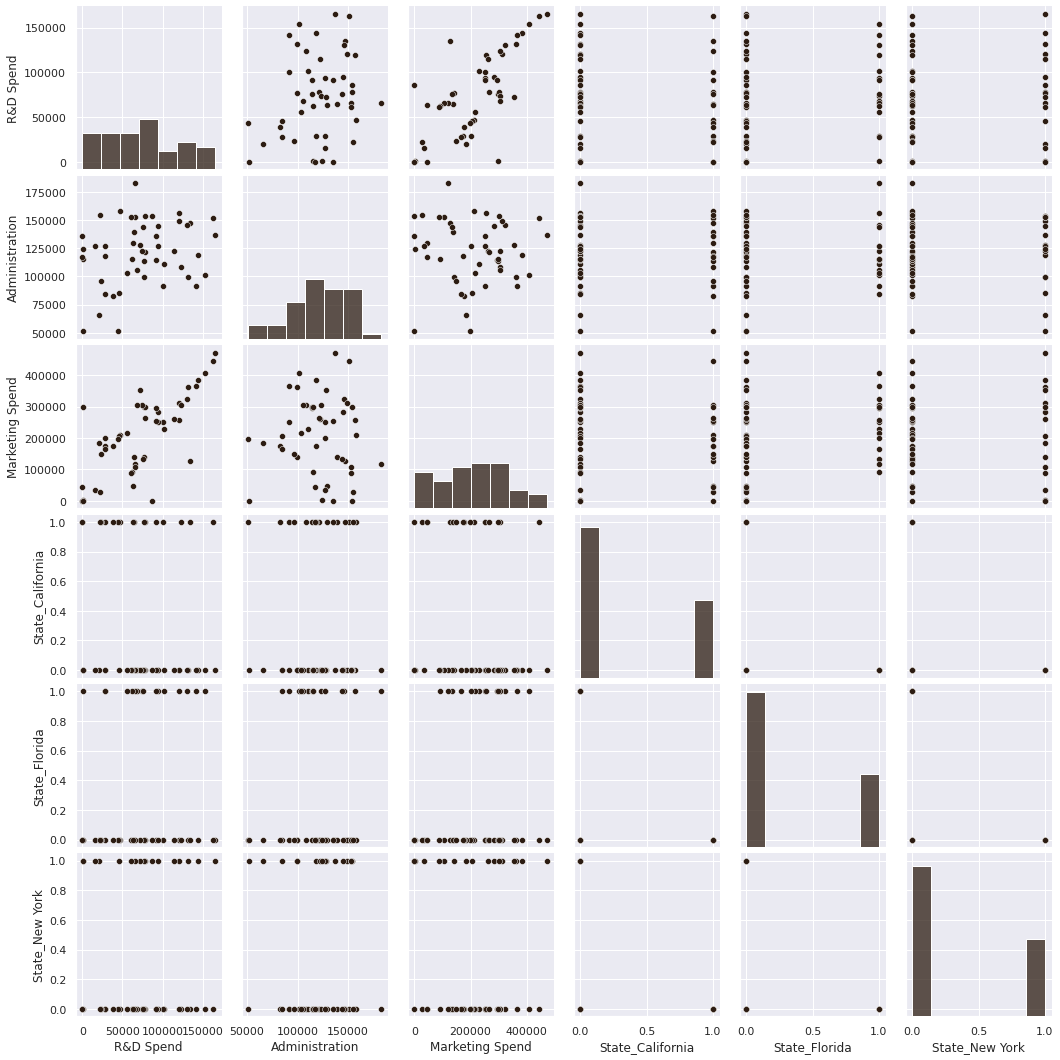

In [25]:
sns.pairplot(data = data)  

1. The visualiztion shows that there is some correaltion between R&D spend and marketing spend.
2. administration spend is not correlated with any other variables

#### **(b) Correlation**

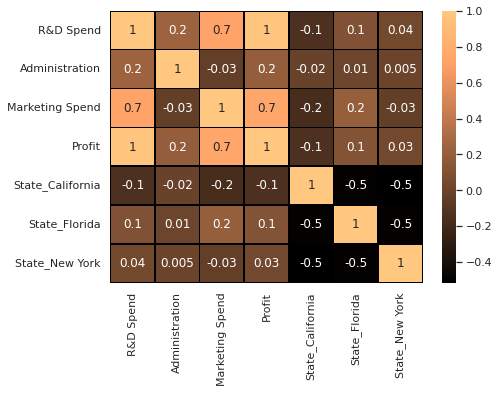

In [26]:
plt.figure(figsize=(7,5))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="copper", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

The R&D spend and Administration gives us a hint of possible collinearity, but to validate the results we shall use VIF.

#### **(c) Variance Inflation Factor**

In [27]:
X = df1[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
4,9.443578,State_Florida
5,9.222969,State_New York
3,9.044052,State_California
0,2.495511,R&D Spend
2,2.416797,Marketing Spend
1,1.177766,Administration


#### **Conclusion:**
Here all the values of VIF are less than 10, hence we shall conclude that all the explanatory variables are independent and there exists no multicollinearity.

### **3. Normality of the errors**

#### **(a) Q-Q Plot**

We shall use the Q-Q plot to check if the error terms follow normal distribution or not.

<Figure size 720x360 with 0 Axes>

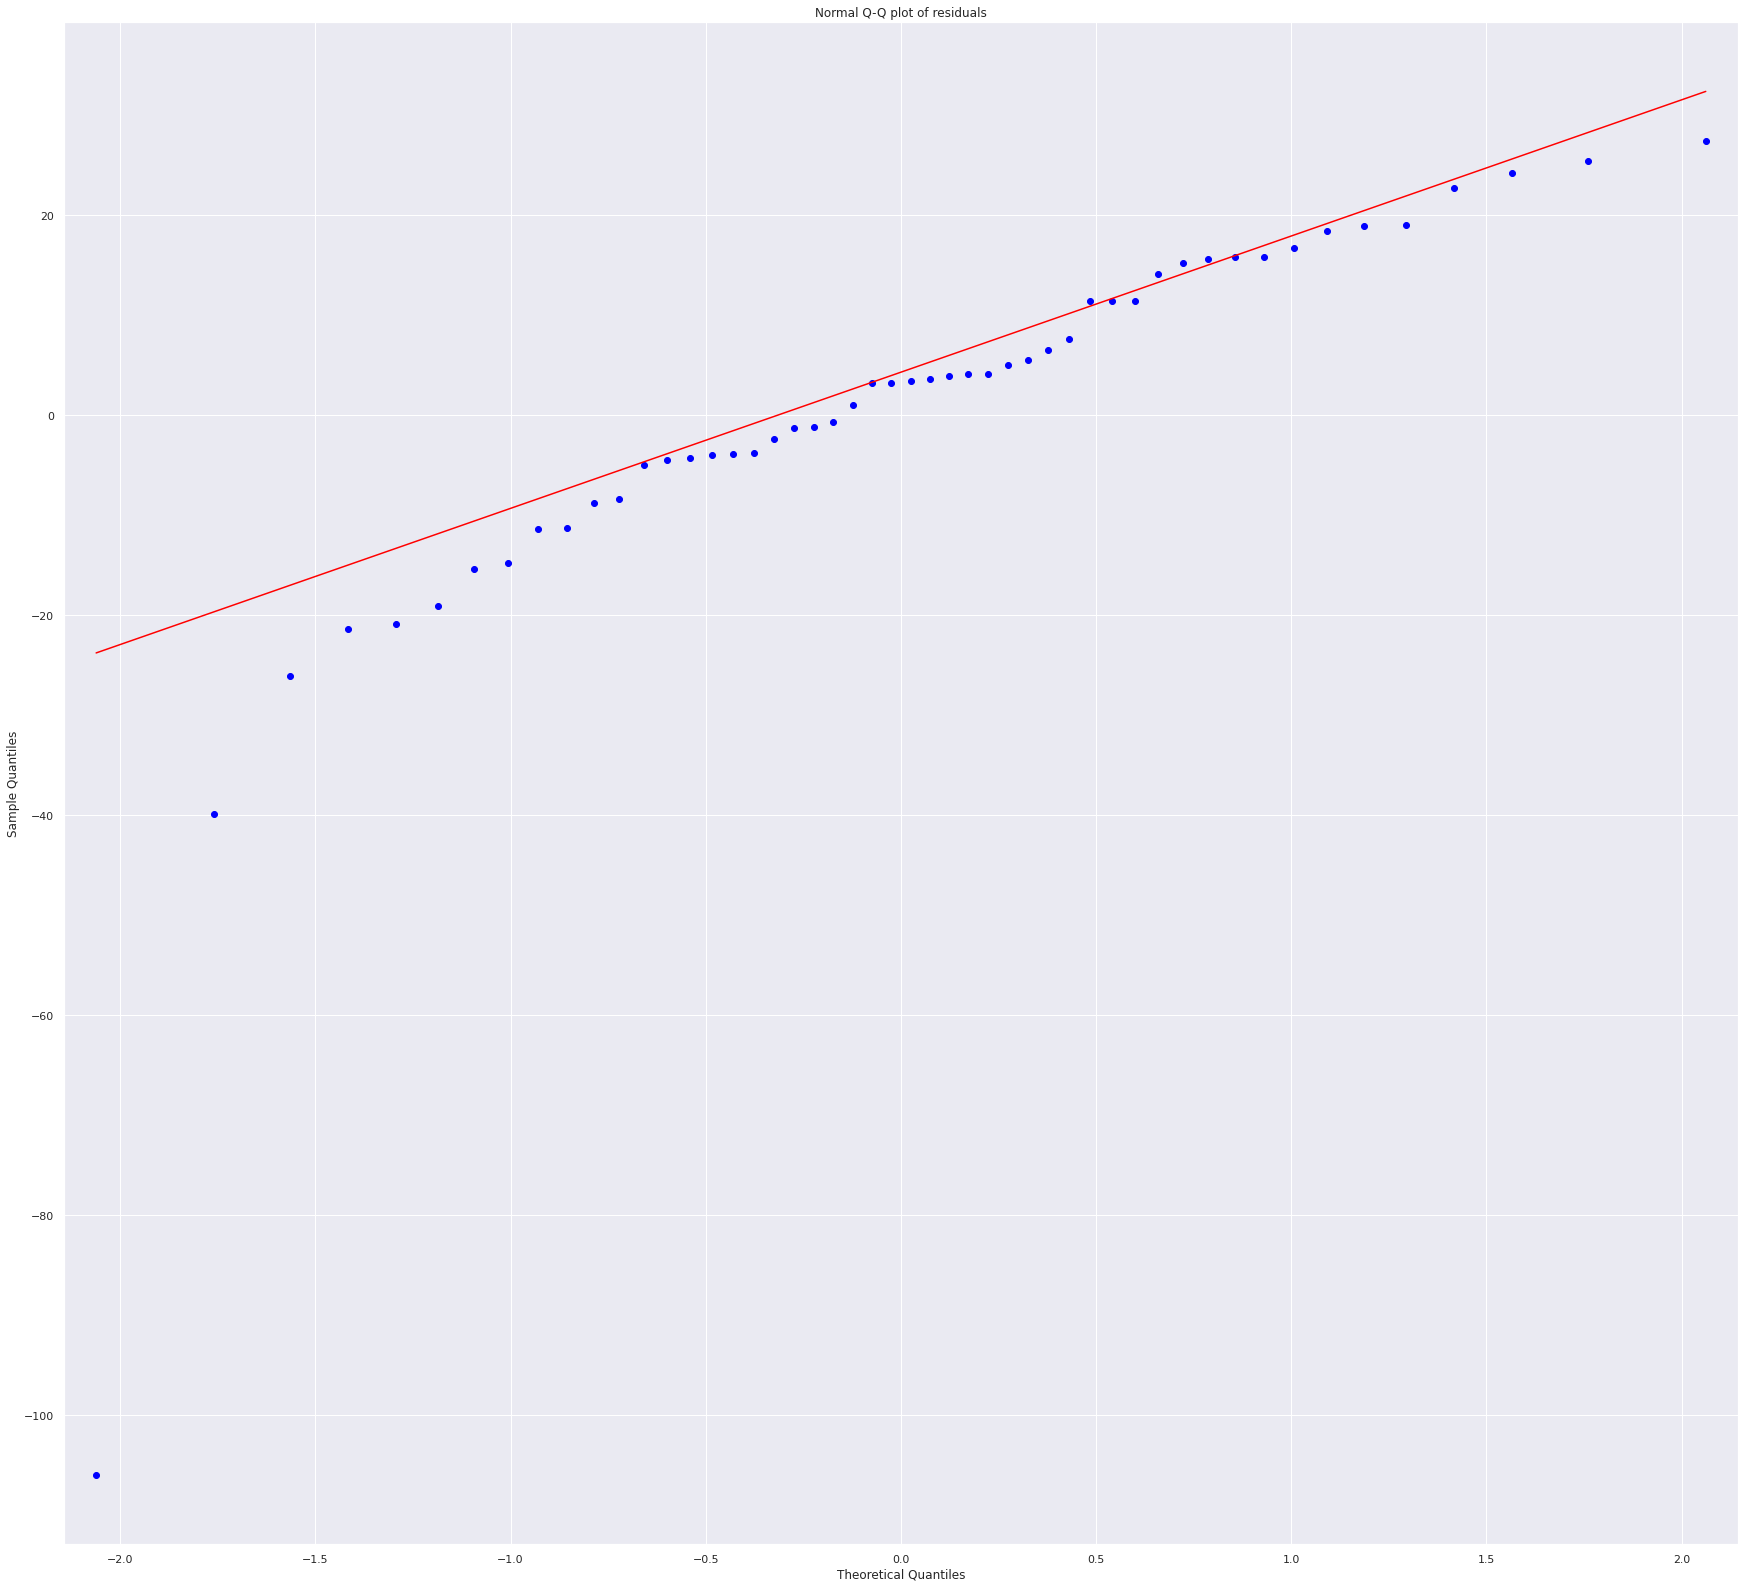

In [28]:
plt.figure(figsize=(10,5))
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

Here, majority of the data points lie near the line, and hence we can conclude that the errors follow normal distribution. But to validate our result, we shall use Shapiro-Wilk Test to check the normality of the errors.

#### **(b) Kolmogrov-Smirnov Test**

##### **Hypothesis :**

>H0 : Error terms are distributed normally

>H1 : Error terms are not distributed normally

In [29]:
#for large dataset
# from scipy.stats import shapiro
# shapiro(model1.resid)

In [30]:
kstest(model1.resid, 'norm')

KstestResult(statistic=0.5392279574733105, pvalue=3.926721744504234e-14)

#### **Conclusion:**
The p-value is less than 0.05, hence reject H0 and conclude that the error terms are not distributed normally.

### **4. Testing Homoscedasticity**

#### **(a) Predicted v/s Residual Plot**

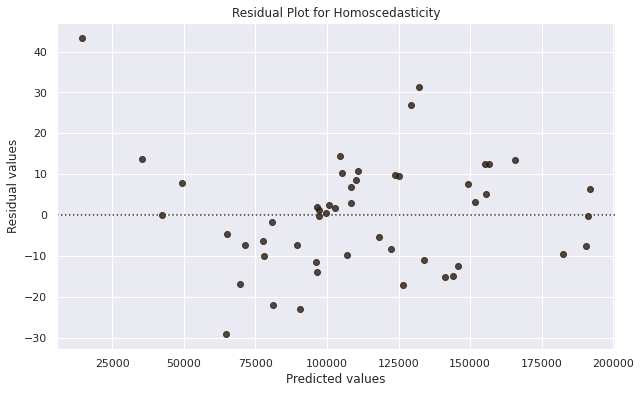

In [31]:
plt.figure(figsize=(10,6))
preds = model1.fittedvalues.copy()
true = df1["Profit"].values.copy()
resid = true-preds
sns.residplot(resid,preds)
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.show()

Here the distribution seems to be random, and hence we can say that there exist homoscedasticity, but to validate our result, we shall use Breush-Pagan Test.

#### **(b) Breush-Pagan Test**

##### **Hypothesis :**

>H0 : the residuals are Homoscedastic

>H1 : the residuals are Hetroscedastic

In [32]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sms.het_breuschpagan(model1.resid, model1.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 5.103578760657418),
 ('p-value', 0.530598761124665),
 ('f-value', 1.0003357028027322),
 ('f p-value', 0.4287994181233852)]

##### **Conclusion :**
The p-value for BP test is 0.5305 greater than 0.05 ,so we may conclude that the residuals are homoscedastic.

### **5. Testing Autocorrelation**

#### **(a) residual plot**

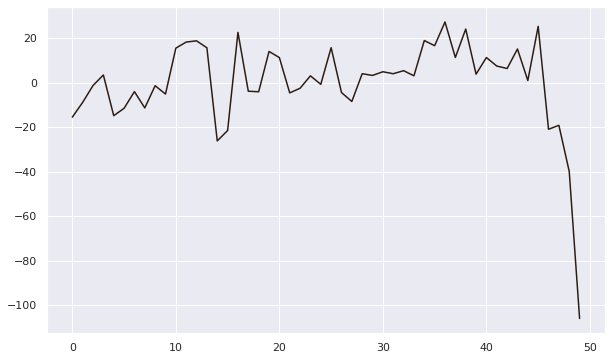

In [33]:
plt.figure(figsize=(10,6))
plt.plot(model1.resid.index, model1.resid)

The plot shows that the data points are spread randomly, but some datapoints are concentrated, hence we are not able to conclude anything. Hence we shall use ACF and PACF plots

#### **(b) ACF and PACF plot**

<Figure size 720x360 with 0 Axes>

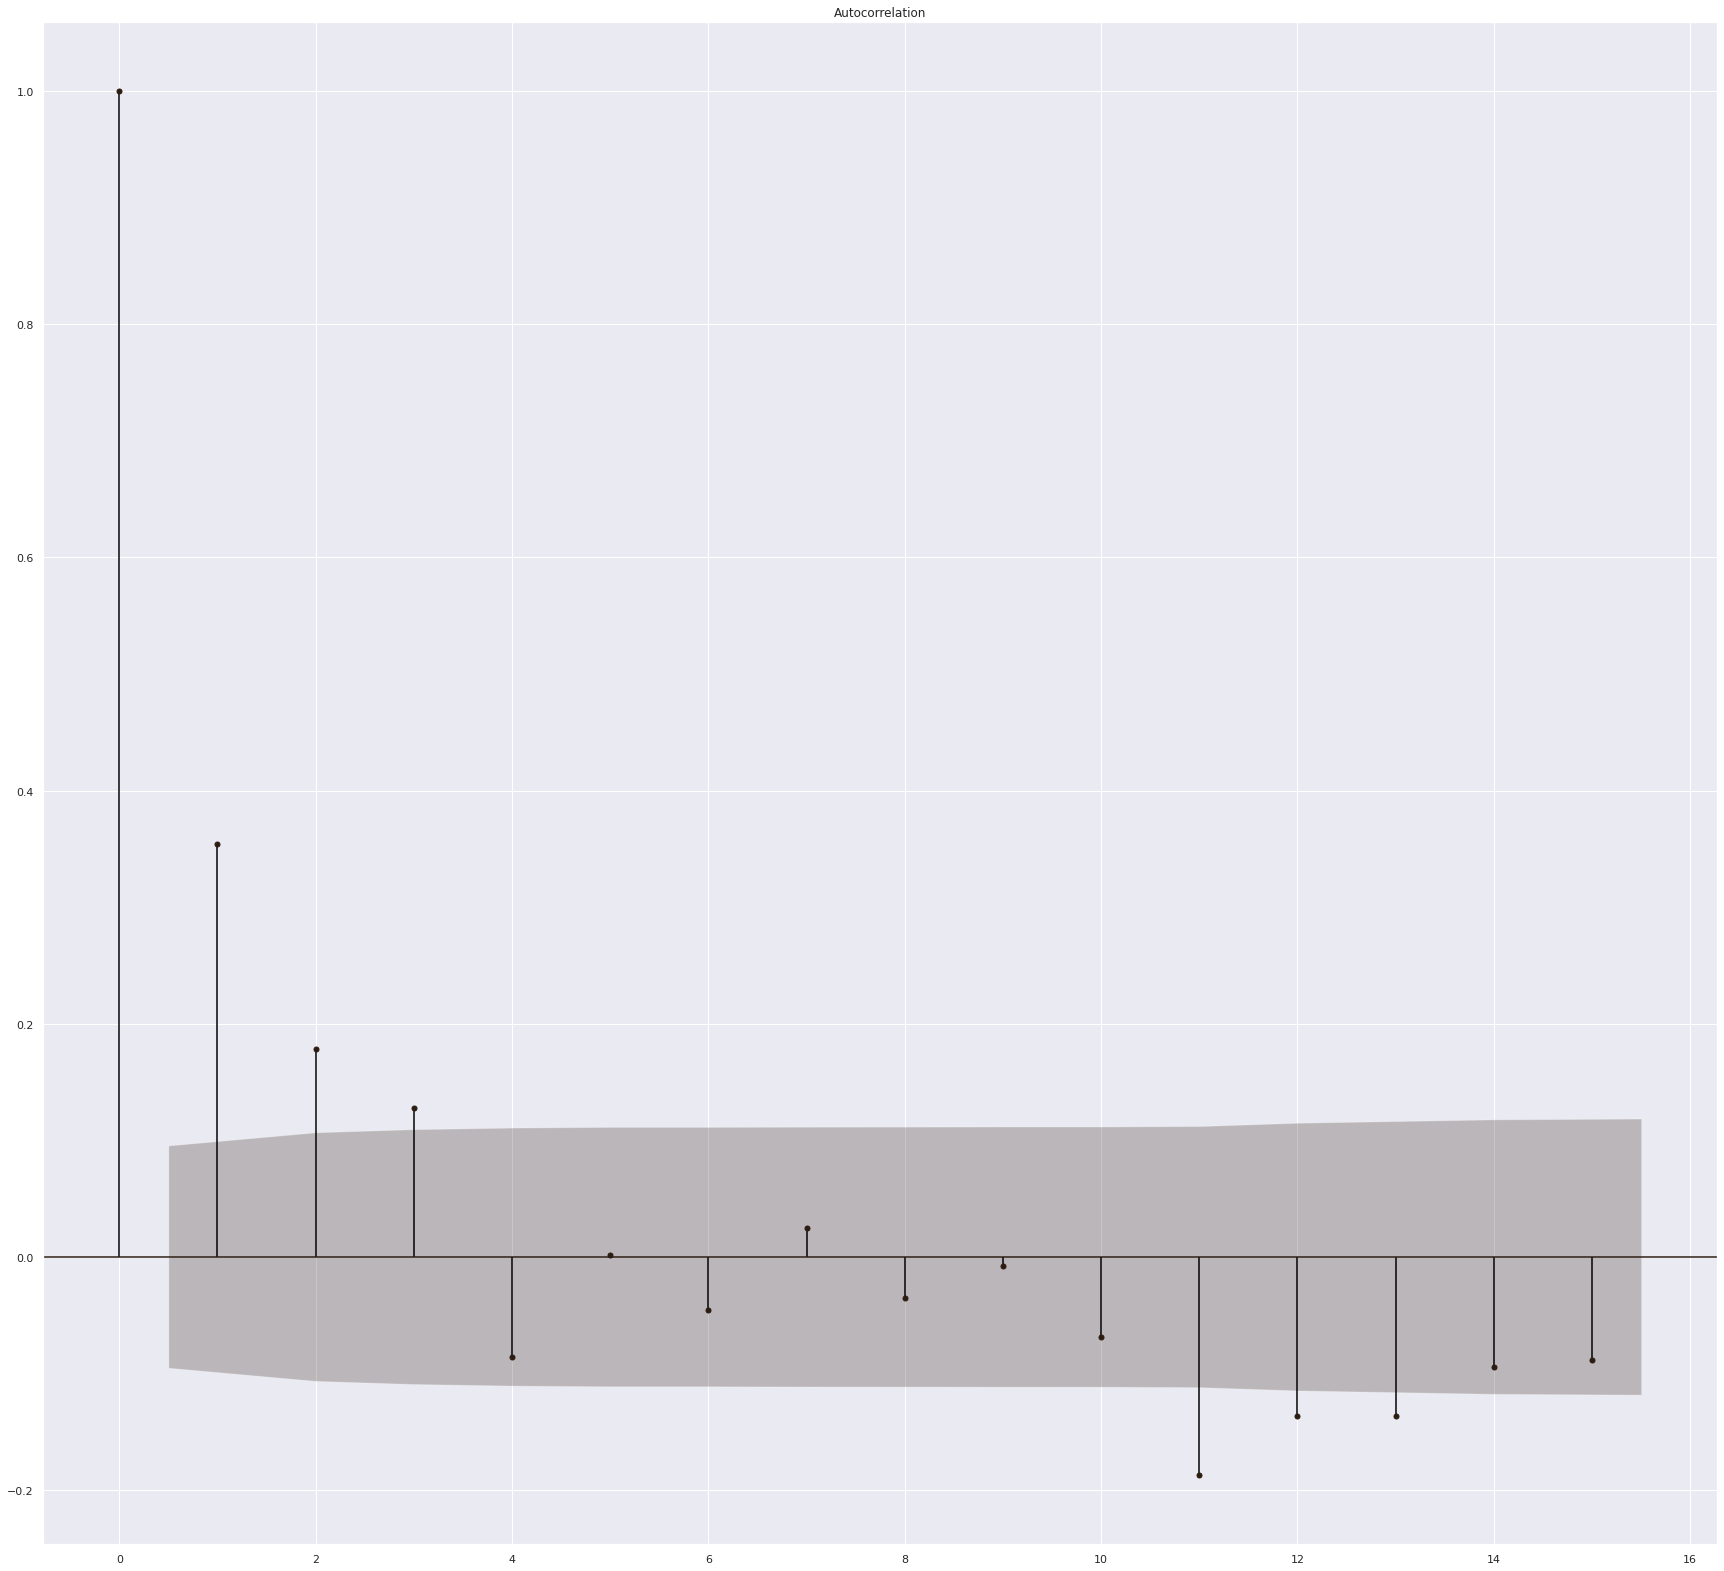

In [34]:
plt.figure(figsize=(10,5))
acf = smt.graphics.plot_acf(model1.resid, lags=15, alpha=0.5)
acf.show()


<Figure size 720x288 with 0 Axes>

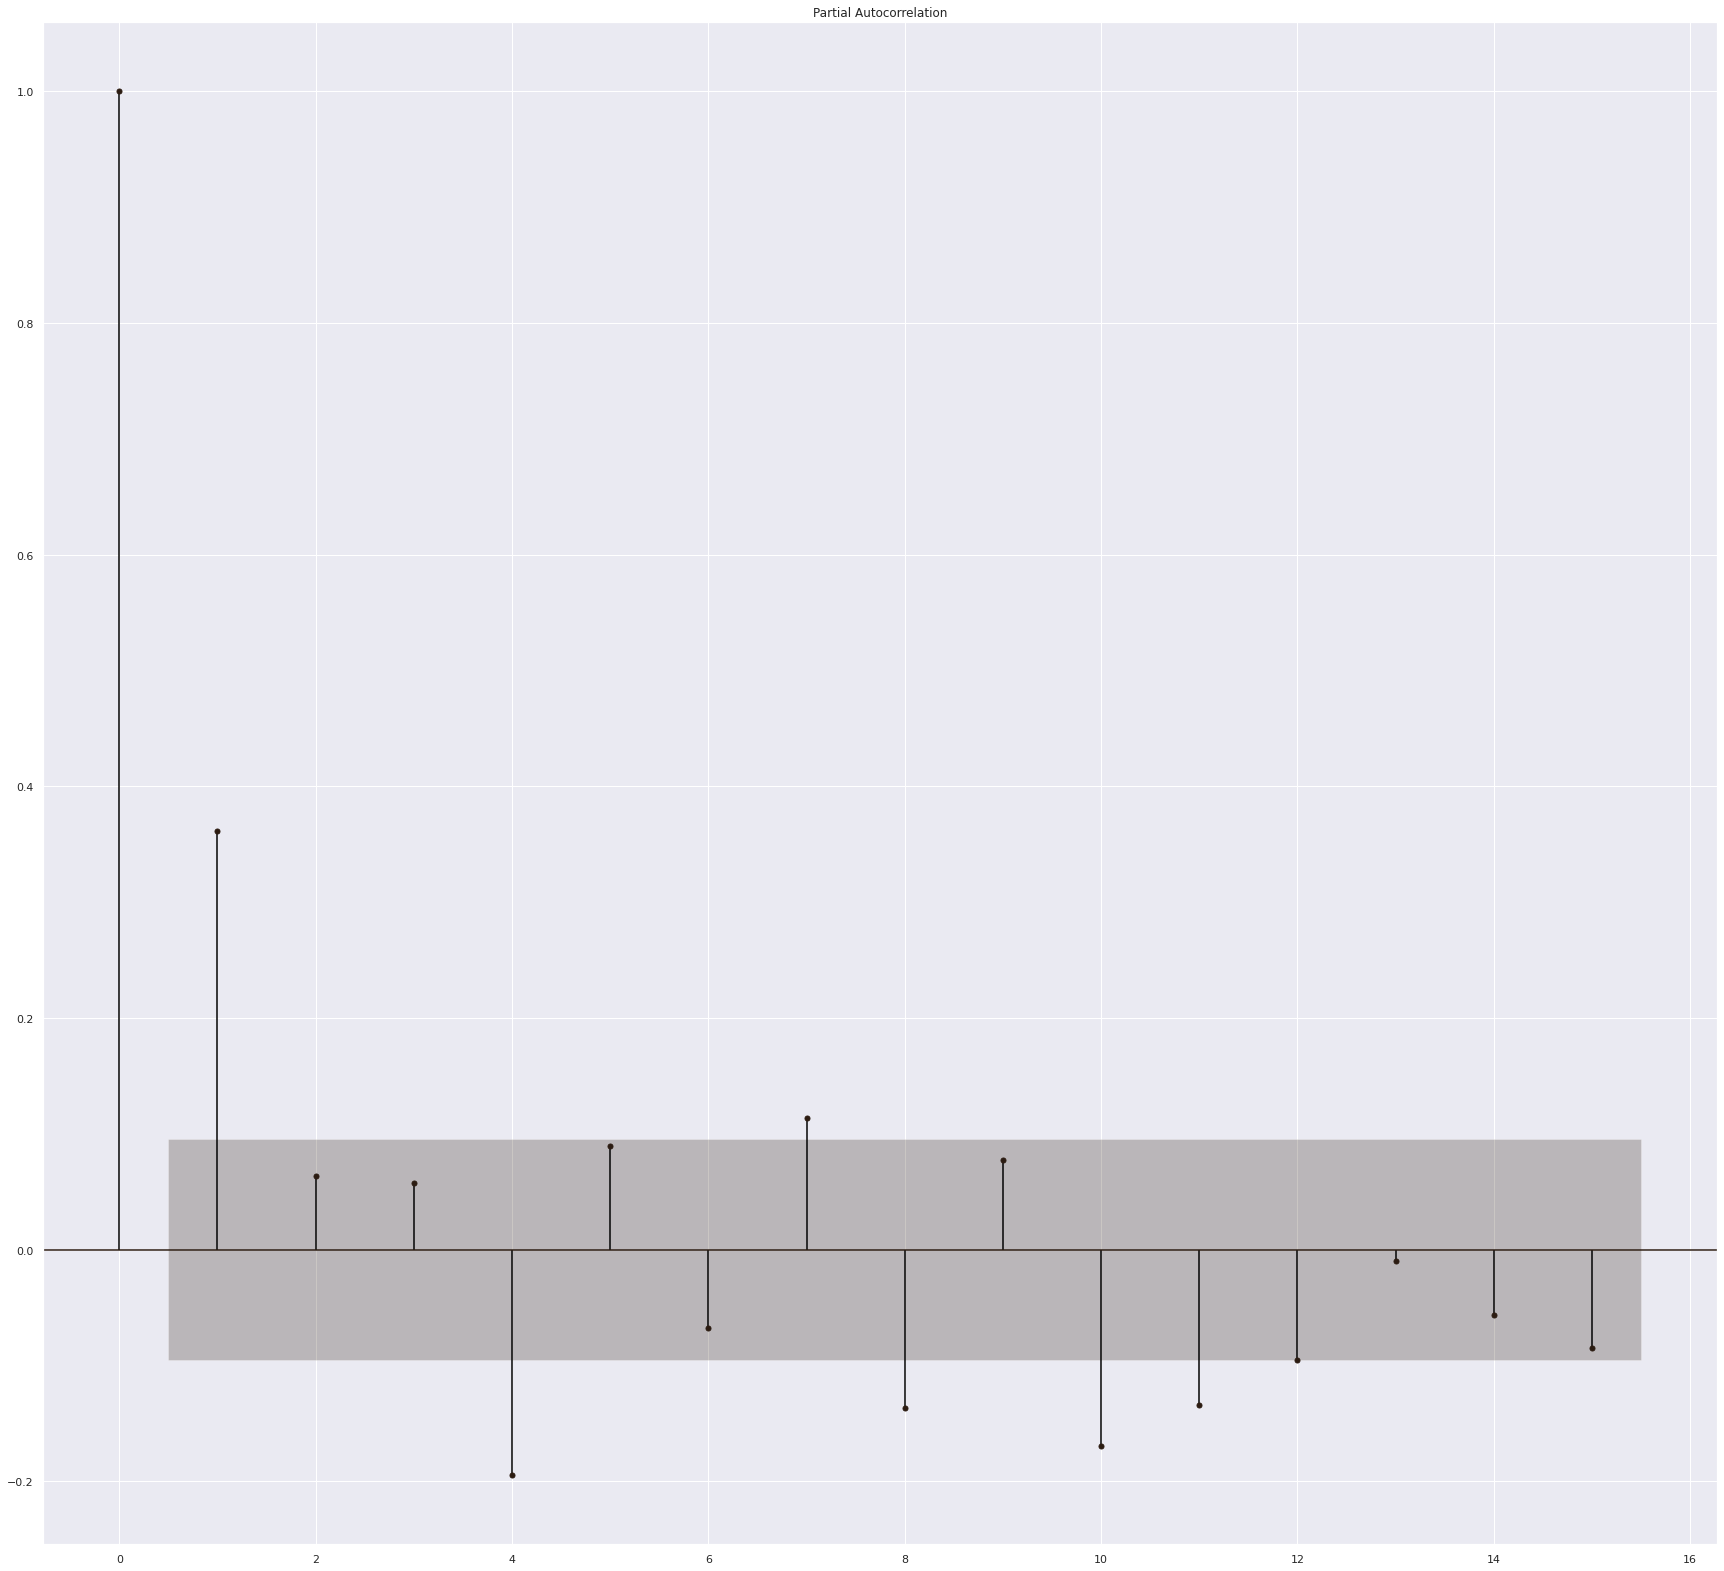

In [35]:
plt.figure(figsize=(10,4))
pacf = smt.graphics.plot_pacf(model1.resid, lags=15, alpha=0.5)
pacf.show()

Here, the graph indicates that there exist autocorrelation, because, some points are outside the level of significance. But to validate our result, we shall use Durbin-Watson test.

#### **(c) Performing Durbin-Watson Test**

>H0 : There is no autocorrelation

>H1 : There is autocorrelation

The value of test statistic :
* Between 2 and 4 : No autocorrelation
* Less than 2 : Positive Autocorrelarion
* More than 4 : Negative Autocorrelation

In [36]:
durbin_watson(model1.resid)

0.7555791542404792

 **Conclusion:**
* The value of test statistic is less than 2, hence it can be concluded that there exist positive correlation between the error terms.

In [37]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance
print(c)

[1.73297869e-02 6.47022413e-03 8.04102771e-05 5.36551738e-04
 1.29366785e-02 5.72995150e-03 1.56043212e-03 4.28624633e-03
 5.54323659e-05 9.79010355e-04 7.76844498e-03 1.34325761e-02
 7.91385396e-03 6.12986166e-03 2.64024478e-02 1.19122851e-02
 1.24105423e-02 4.32841482e-04 3.61802482e-04 2.00060152e-02
 3.94901088e-03 1.07825182e-03 1.60953627e-04 3.00329886e-04
 1.56687757e-05 6.05454266e-03 6.81443306e-04 4.15948552e-03
 1.33489851e-03 3.94086276e-04 1.10249175e-03 6.32805495e-04
 1.26962502e-03 2.60074148e-04 1.99522737e-02 9.96205884e-03
 2.98985116e-02 1.06947410e-02 3.80318748e-02 5.42064054e-04
 3.83365482e-03 2.44264948e-03 1.28115315e-03 9.14674424e-03
 5.28055469e-05 3.18811206e-02 6.29595177e-02 1.67964605e-02
 2.15627774e-01 4.14903419e-01]


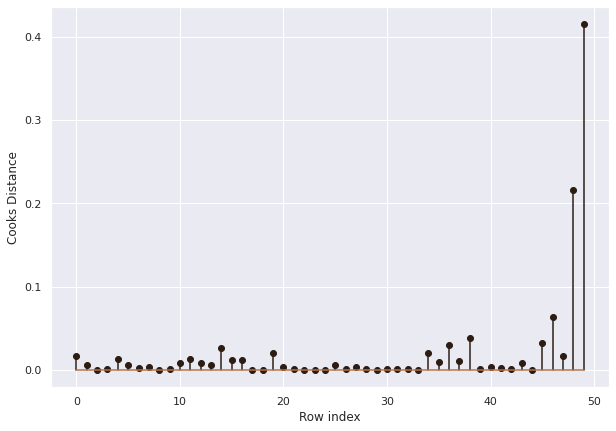

In [38]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(10, 7))
plt.stem(np.arange(len(df1)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
k = df1.shape[1] # columns
n = df1.shape[0] # rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

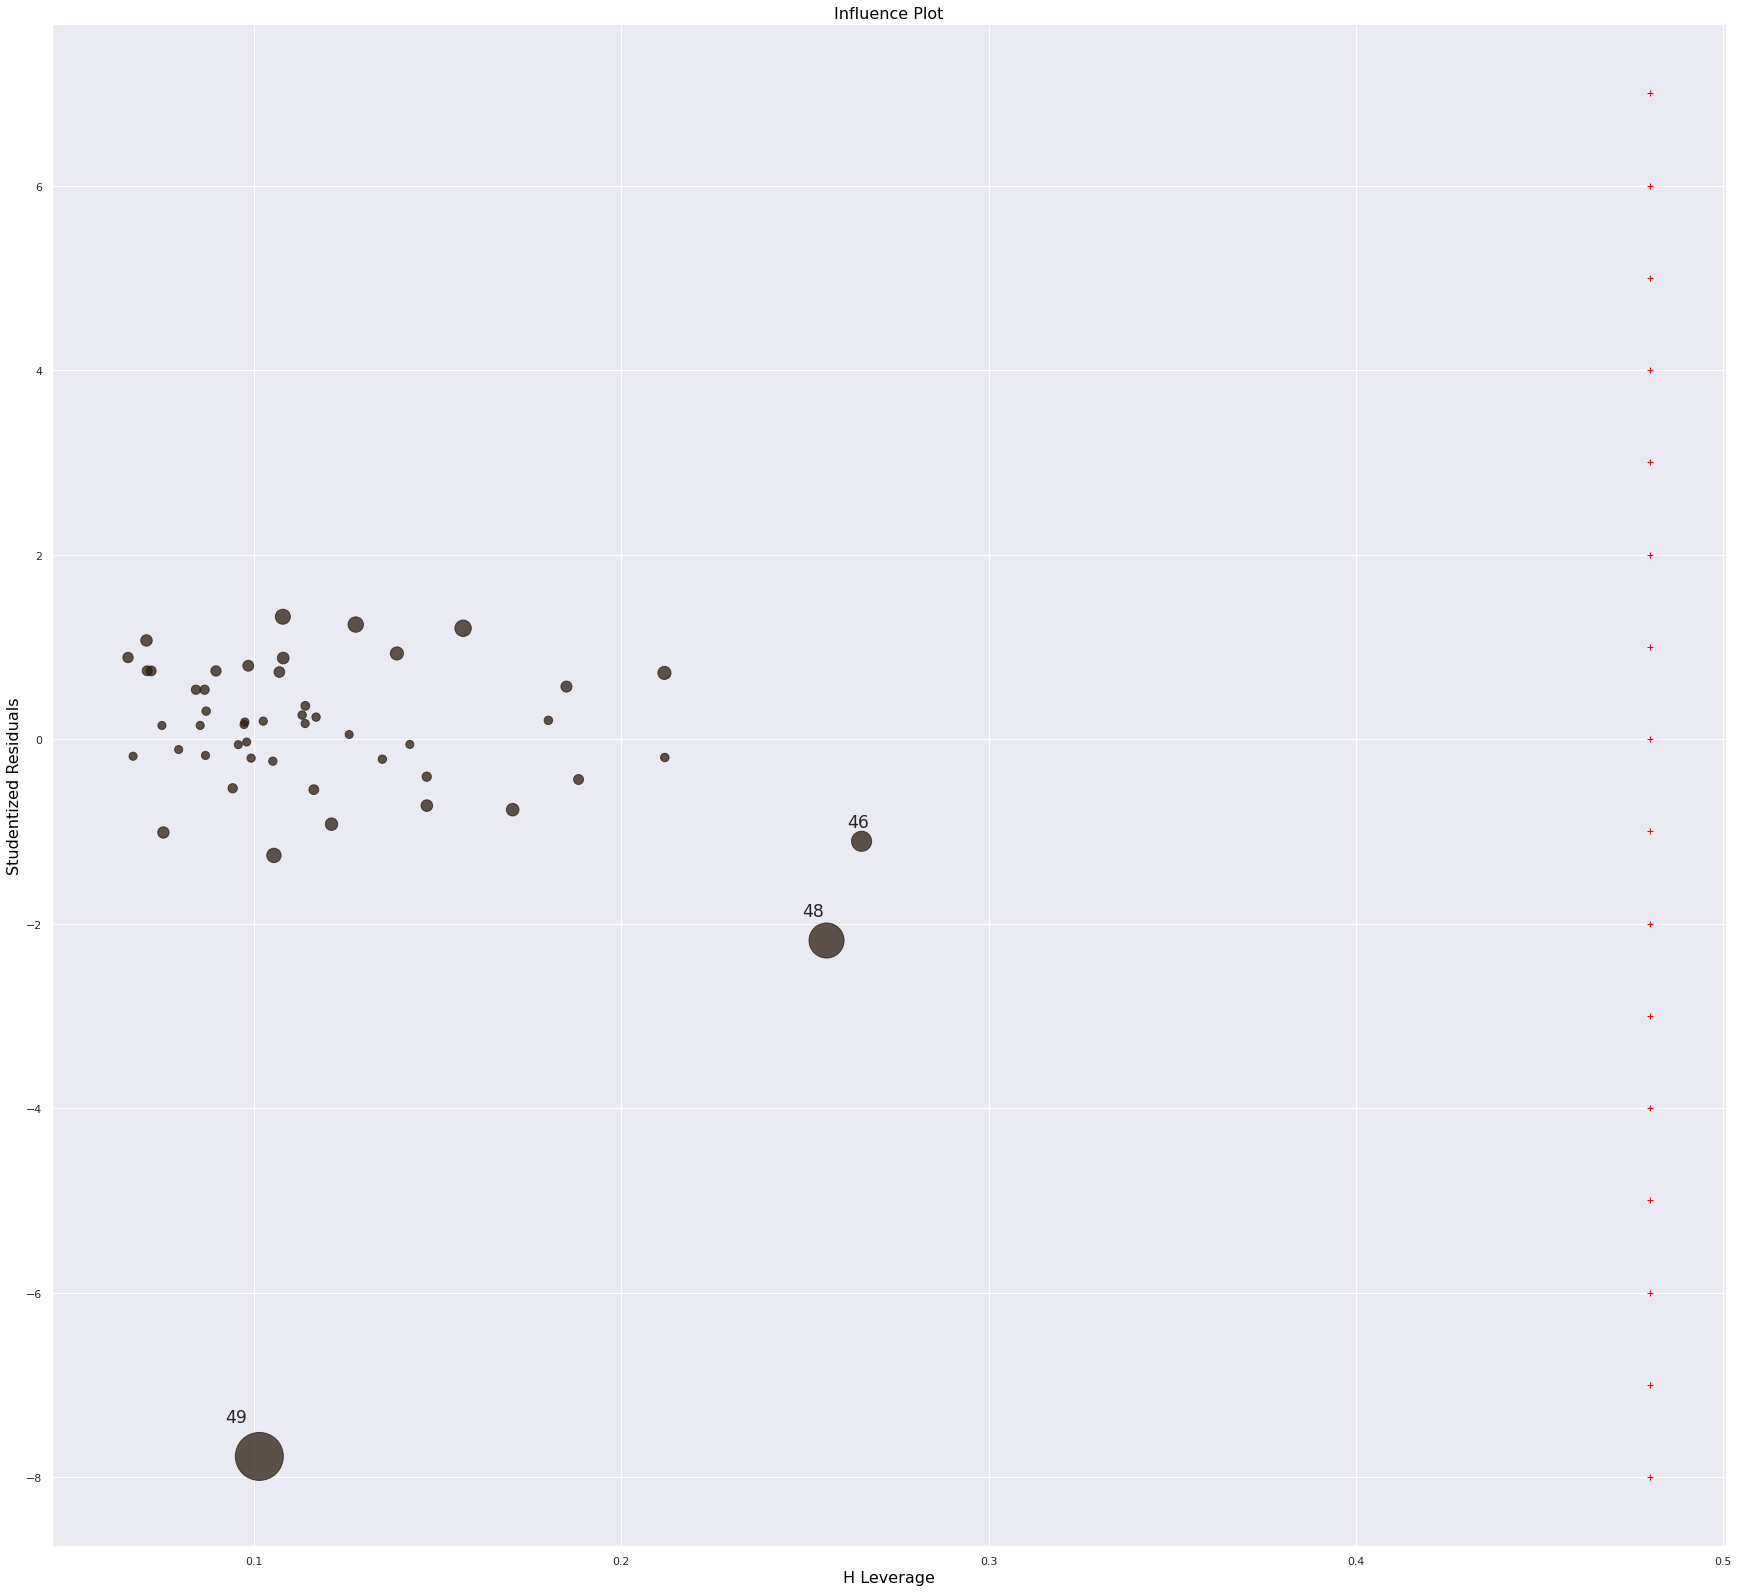

In [40]:
influence_plot(model1,alhpa=0.5)

y=[i for i in range(-8,8)]
x=[leverage_cutoff for i in range(16)]
plt.plot(x,y,'r+')

plt.show()

* Here, all the values are lying inside the line of significancy, which indicates that there are no datapoints, in the datasets that are acting as outliers.